# Support Vector Machines and Kernels

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [9]:
from __future__ import print_function
import os
#Please set the path below as per your system data folder location
#data_path = ['..', 'data']
data_path = ['data']

## Question 1

* Import the data.
* Create the target variable `y` as a 1/0 column where 1 means red.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.

In [10]:
import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['Wine_Quality_Data.csv'])
data = pd.read_csv(filepath, sep=',')

In [7]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [18]:
#Splitting the data between X and y
X = data.drop('color', axis=1)
y = data.color

##Creating target variable into binary
print(data.color.unique())

colors = {'red':1, 'white':0}

y = pd.DataFrame([colors[item] for item in y])

['red' 'white']


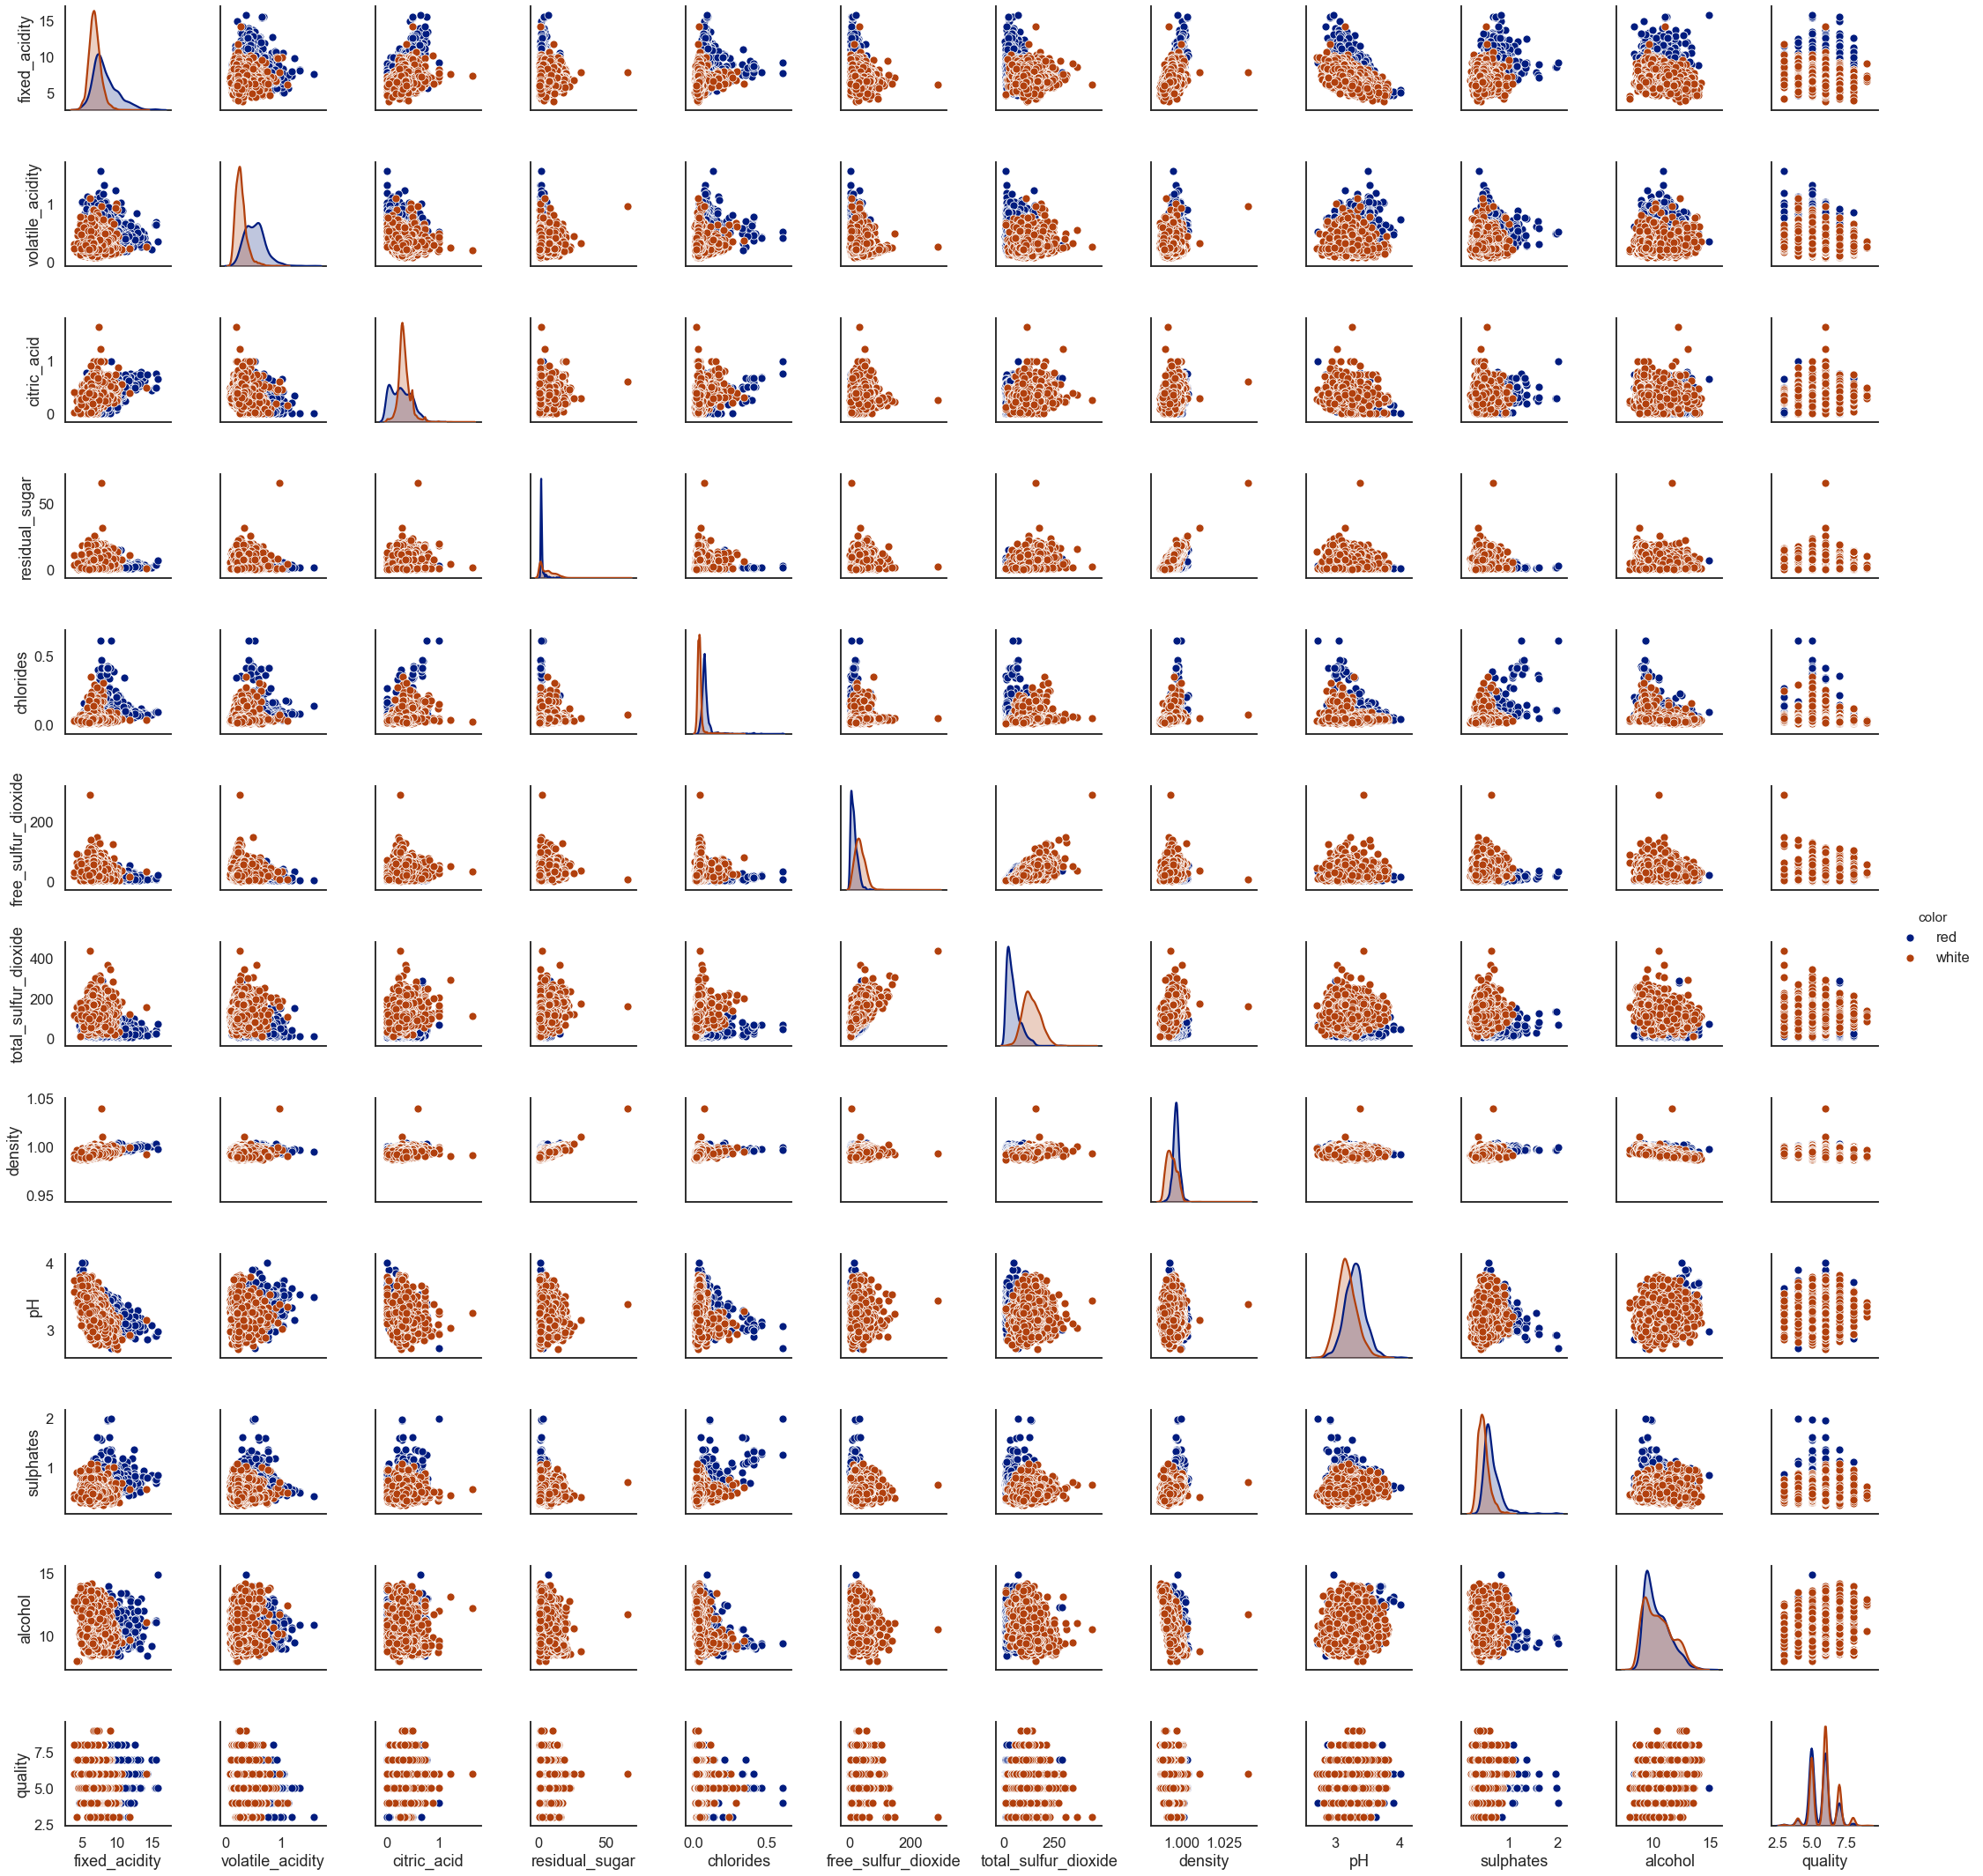

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

sns.pairplot(data, hue='color')

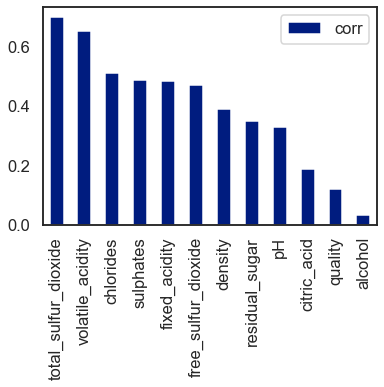

In [21]:
cor_dict = {}

for column in X.columns:
    cor_dict[column] = abs(X[column].corr(y[0]))
    
cor_df = pd.DataFrame.from_dict(cor_dict, orient='index').sort_values(0, ascending=False)
cor_df.columns = ['corr']
cor_df.plot.bar()

In [22]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

X_new = data[['total_sulfur_dioxide', 'volatile_acidity']]
X_new = pd.DataFrame(mm_scaler.fit_transform(X_new), columns=X_new.columns)
X_new.describe()

,total_sulfur_dioxide,volatile_acidity
count,6497.000000,6497.000000
mean,0.252868,0.173111
std,0.130235,0.109758
min,0.000000,0.000000
25%,0.163594,0.100000
50%,0.258065,0.140000
75%,0.345622,0.213333
max,1.000000,1.000000


## Question 2

The goal for this question is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py) in sklearn's documentation. 

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
```

Feel free to experiment with different parameter choices for LinearSVC and see the decision boundary.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


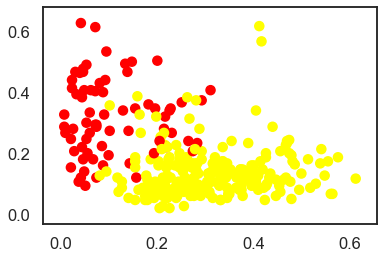

In [23]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC = LSVC.fit(X_new, y)

#Sample the data set for 300 samples
X_color = X_new.sample(n=300, random_state=42)
y_color = data.color.sample(n=300, random_state=42)

#Change y_color from white to yellow
colors1 = {'red':'red','white': 'yellow'}
y_color = [colors1[item] for item in y_color]

#Scatterplot of X_color
ax = plt.scatter(X_color.total_sulfur_dioxide, X_color.volatile_acidity, c=y_color);

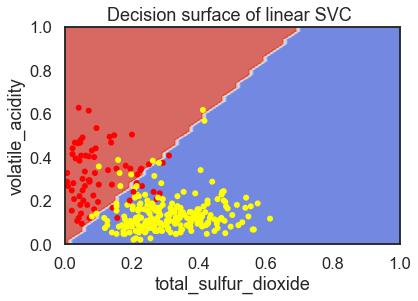

In [24]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

title = 'Decision surface of linear SVC '
xx, yy = make_meshgrid(X_color.total_sulfur_dioxide, X_color.volatile_acidity)

fig, ax = plt.subplots()
plot_contours(ax, LSVC, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X_color.total_sulfur_dioxide, X_color.volatile_acidity, c=y_color, s=20)
ax.set_ylabel('volatile_acidity')
ax.set_xlabel('total_sulfur_dioxide')
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.set_title(title)
plt.show()

## Question 3

Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are:
    <ol>
     <li> fit model
     <li> get sample 300 records from X and the corresponding y's
     <li> create grid, predict, plot using ax.contourf
     <li> add on the scatter plot
    </ol>
* After copying and pasting code, make sure the finished function uses your input `estimator` and not the LinearSVC model you built.
* For the following values of `gamma`, create a Gaussian Kernel SVC and plot the decision boundary.  
`gammas = [.5, 1, 2, 10]`
* Holding `gamma` constant, for various values of `C`, plot the decision boundary. You may try  
`Cs = [.1, 1, 10]`

In [34]:
def plot_decision_boundary(estimator, X, y):
    #Fit the model
    estimator.fit(X,y)
    
    #Sampling data
    X = X.sample(n=300, random_state=42)
    y = y.sample(n=300, random_state=42)
    
    #Change y_color from int to red and yellow
    y_color = y[0].map(lambda r: 'red' if r==1 else 'yellow')
    
    title = 'Decision surface of estimator'
    xx, yy = make_meshgrid(X.total_sulfur_dioxide, X.volatile_acidity)

    fig, ax = plt.subplots()
    plot_contours(ax, estimator, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X_color.total_sulfur_dioxide, X_color.volatile_acidity, c=y_color, s=20)
    ax.set_ylabel('volatile_acidity')
    ax.set_xlabel('total_sulfur_dioxide')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.set_title(title)
    

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

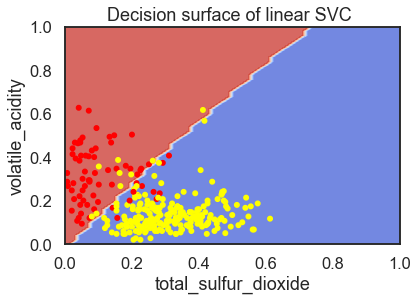

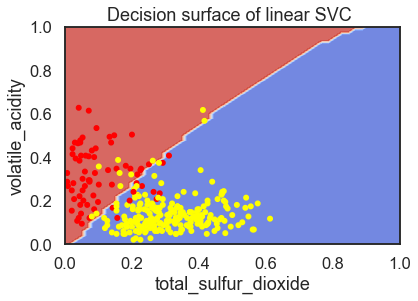

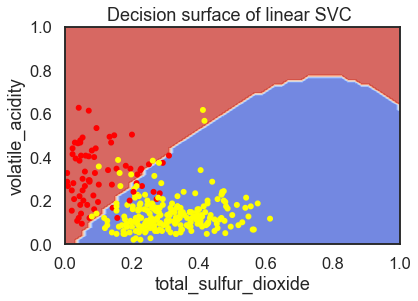

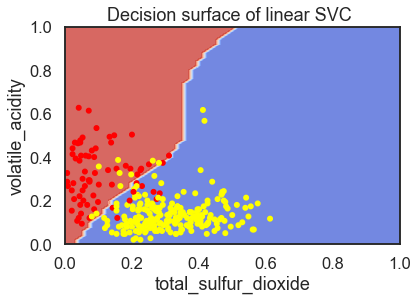

In [38]:
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10]

for gamma in gammas:
    rbf_svc = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(rbf_svc, X_new, y)


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


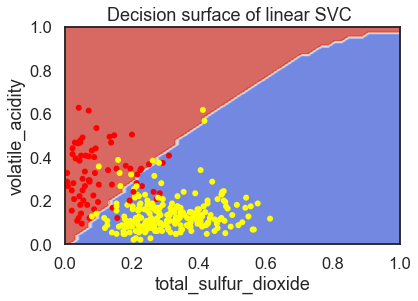

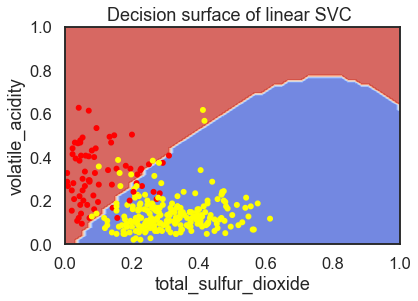

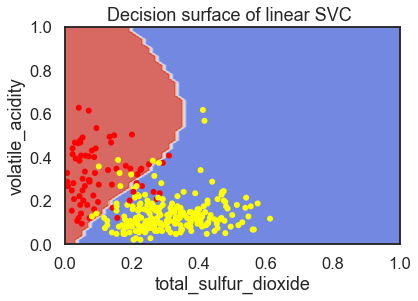

In [39]:
Cs = [.1, 1, 10]

for c in Cs:
    rbf_svc = SVC(kernel='rbf', gamma=2, C=c)
    plot_decision_boundary(rbf_svc, X_new, y)

## Question 3A

Let's now fit a Polynomial kernel SVC with degree 3 and see how the decision boundary changes.

* Use the plot decision boundary function from the previous question and try the Polynomial Kernel SVC
* For various values of `C`, plot the decision boundary. You may try  
`Cs = [10,20,100,200]`
* Try to find out a C value that gives the best possible decision boundary

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better 

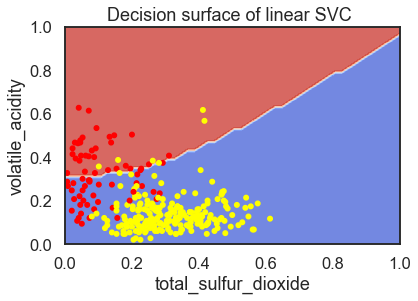

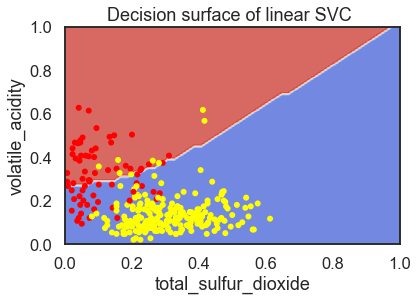

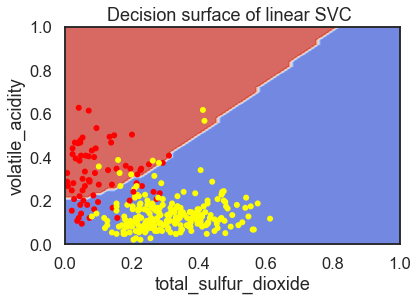

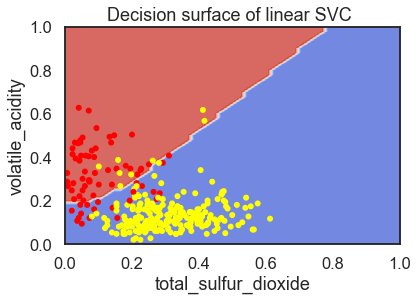

In [40]:
# Try with Polynomial kernel SVC
Cs = [10,20,100,200]

for C in Cs:
    poly_svc = SVC(kernel='poly', degree=3, C=C)
    plot_decision_boundary(poly_svc, X_new, y)

## Question 4

In this question, we will compare the fitting times between SVC vs Nystroem with rbf kernel.  
<br><br>
Jupyter Notebooks provide a useful magic function **`%timeit`** which executes a line and prints out the time it took to fit. If you type **`%%timeit`** in the beginning of the cell, then it will run the whole cell and output the running time.

* Re-load the wine quality data if you made changes to the original.
* Create `y` from data.color, and `X` from the rest of the columns.
* Use `%%timeit` to get the time for fitting an SVC with rbf kernel.
* Use `%%timeit` to get the time for the following: fit_transform the data with Nystroem and then fit a SGDClassifier.

Nystroem+SGD will take much shorter to fit. This difference will be more pronounced if the dataset was bigger.

* Make 5 copies of X and concatenate them
* Make 5 copies of y and concatenate them
* Compare the time it takes to fit the both methods above

In [43]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

y = data.color == 'red'
X = data[data.columns[:-1]]

In [56]:
%%timeit
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X,y)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

1.09 s ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%%timeit
nystroem = Nystroem(random_state=42)
X_transformed = nystroem.fit_transform(X)

sgd = SGDClassifier()
sgd.fit(X_transformed, y)

80.2 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [64]:
#Concatenate data
X_copy = pd.concat([X]*5, ignore_index=True)
y_copy = pd.concat([y]*5, ignore_index=True)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32480,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
32481,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
32482,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
32483,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [67]:
%%timeit 
svc = SVC(kernel='rbf')
svc.fit(X_copy, y_copy)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

17.6 s ± 566 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
%%timeit
nystroem = Nystroem(random_state=42)
X_transformed_copy = nystroem.fit_transform(X_copy)

sgd = SGDClassifier()
sgd.fit(X_transformed_copy, y_copy)

259 ms ± 8.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Question 5
Try Tuning hyper-parameters for the svm kernal using GridSearchCV

* Take the complete dataset
* Define y as data.color = 'red'
* Remaining columns as X
* Do a test and train split
* Set parameters for cross validation. Do this for as many values of gamma and C
* Using gridsearchcv to run through the data using the various parameters values
* Get the mean and standard deviation on the set for the various combination of gamma and C values
* print the best parameters in the training set

In [18]:
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#Splitting the data between X and y
X = data.drop('color', axis=1)
y = data.color == 'red'

#Parameters
parameters = {'C': [10,20,100,200], 'gamma':[.5, 1, 2, 10]}

#New SVC
svc2 = svm.SVC(kernel='rbf')

#Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
   
#GridSearchCV hyperparameter tuning
svc_gs = GridSearchCV(svc2, parameters, cv=5)

#Fit the GridSearch3
svc_gs.fit(X_train, y_train)

#Get mean and std of time
print(np.means(vc_gs.cv_results_['mean_fit_time']))

#Print best parameters
print(svc_gs.best_params_)

[0.52272544 0.44582562 0.41188679 0.36576004 0.47458491 0.44517627
 0.41389656 0.38445292 0.47881742 0.44385219 0.41921091 0.36892991
 0.47460899 0.44656172 0.41121793 0.36968579]
{'C': 10, 'gamma': 0.5}


In [29]:
#Get mean and std of time
print("Mean time fit: " + str(np.mean(svc_gs.cv_results_['mean_fit_time'])))
print("SD time fit: " + str(np.mean(svc_gs.cv_results_['std_fit_time'])))

#Print best parameters
print(svc_gs.best_params_)

Mean time fit: 0.42982458770275117
SD time fit: 0.010292479429149796
{'C': 10, 'gamma': 0.5}


## Question 6
   Use the model from previous question to predict 
 
 * Perform the prediction on the test set  
 * Print confusion matrix, accuracy and classification report

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = svc_gs.predict(X_test)

#Confusion matrix
cfm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
clf_r = classification_report(y_test, y_pred)


'              precision    recall  f1-score   support\n\n       False       0.86      1.00      0.92      1191\n        True       0.99      0.54      0.70       434\n\n    accuracy                           0.88      1625\n   macro avg       0.92      0.77      0.81      1625\nweighted avg       0.89      0.88      0.86      1625\n'

In [52]:
print(f'Confusion Matrix: {cfm}')
print(f'Accuracy Score: {accuracy}')
print(f'Classification Report:')
print(clf_r)

Confusion Matrix: [[1189    2]
 [ 201  233]]
Accuracy Score: 0.8750769230769231
Classification Report:
              precision    recall  f1-score   support

       False       0.86      1.00      0.92      1191
        True       0.99      0.54      0.70       434

    accuracy                           0.88      1625
   macro avg       0.92      0.77      0.81      1625
weighted avg       0.89      0.88      0.86      1625

